In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire as a
import prepare as p
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

In [2]:
# wrangle zillow
df = w.wrangle_zillow()

In [3]:
# reset index
df = df.reset_index().drop('index',axis=1)

In [4]:
# snip-it of df
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,2.341702
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,1.208457
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,1.225289
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,1.719219
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,3.687428


In [5]:
# Looking for outliers. Will reomve 952k and 531k sq feet houses. 
df.sq_ft.sort_values(ascending=False)

843039     952576.0
1672841    531118.0
1418774     63692.0
823792      59220.0
526830      52503.0
             ...   
1264871         1.0
1996965         1.0
1876700         1.0
58072           1.0
1346831         1.0
Name: sq_ft, Length: 2130214, dtype: float64

In [6]:
# Dropped the outliers
df.drop(index=[843039, 1672841], inplace=True)

In [7]:
# Verifying outliers have been eliminated
df.sq_ft.sort_values(ascending=False)

1418774    63692.0
823792     59220.0
526830     52503.0
1315688    45891.0
398701     42831.0
            ...   
1037839        1.0
58072          1.0
1346831        1.0
1264871        1.0
1876700        1.0
Name: sq_ft, Length: 2130212, dtype: float64

In [8]:
train, val, test = p.split_data_continious(df)
train.shape, val.shape, test.shape

((1192918, 8), (511251, 8), (426043, 8))

## Load Zillow dataset

Done.

## Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

**assuming X and y are already defined**

model = LinearRegression().fit(X, y)

predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the zillow dataset.


In [9]:
# average house value
train.tax_value.mean()

461672.6077282764

In [10]:
# average sq. ft. 
train.sq_ft.mean()

1865.0631988116534

In [11]:
# df of house value and sq ft
preds = train[['tax_value', 'sq_ft']]

In [12]:
# snip-it of preds
preds.head()

,tax_value,sq_ft
908940,410889.0,1686.0
1209206,289844.0,1150.0
2057157,660660.0,2070.0
1189067,897971.0,2757.0
1726528,779863.0,2987.0


In [13]:
# create object
ols_model = LinearRegression()

In [14]:
# fit object
ols_model.fit(train[['sq_ft']], train[['tax_value']])

LinearRegression()

y^ = predictions(x-value)

In [15]:
preds['yhat'] = ols_model.predict(train[['sq_ft']])

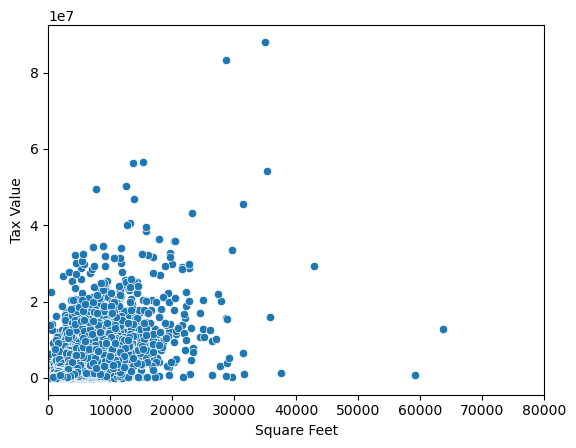

In [16]:
sns.scatterplot(x=preds.sq_ft, y=preds.tax_value)
plt.xlim(0, 80000)
plt.xlabel('Square Feet')
plt.ylabel('Tax Value')
plt.show()

## Compute Residuals

preds minus actual

In [17]:
# Baseline
preds['bs_preds'] = train.tax_value.mean()

In [18]:
preds.head()

,tax_value,sq_ft,yhat,bs_preds
908940,410889.0,1686.0,385647.556594,461672.607728
1209206,289844.0,1150.0,158077.471402,461672.607728
2057157,660660.0,2070.0,548682.841507,461672.607728
1189067,897971.0,2757.0,840363.155922,461672.607728
1726528,779863.0,2987.0,938014.498448,461672.607728


In [19]:
# Baseline residuals
preds['bs_res'] = preds['bs_preds'] - preds['tax_value']

In [20]:
# yhat residuals
preds['yhat_res'] = preds['yhat'] - preds['tax_value']

In [21]:
preds.head()

,tax_value,sq_ft,yhat,bs_preds,bs_res,yhat_res
908940,410889.0,1686.0,385647.556594,461672.607728,50783.607728,-25241.443406
1209206,289844.0,1150.0,158077.471402,461672.607728,171828.607728,-131766.528598
2057157,660660.0,2070.0,548682.841507,461672.607728,-198987.392272,-111977.158493
1189067,897971.0,2757.0,840363.155922,461672.607728,-436298.392272,-57607.844078
1726528,779863.0,2987.0,938014.498448,461672.607728,-318190.392272,158151.498448


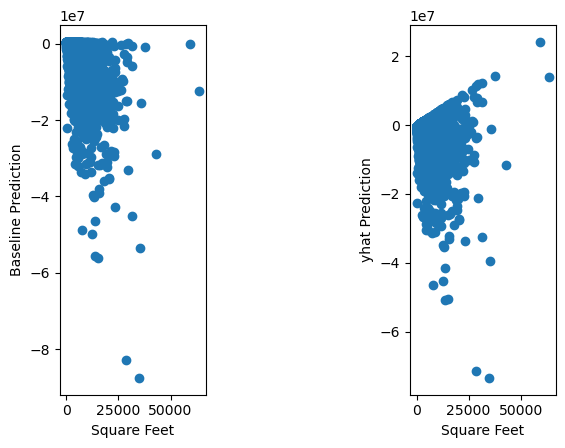

In [22]:
plt.subplot(131)
plt.scatter(x=preds.sq_ft, y=preds.bs_res)
plt.xlabel('Square Feet')
plt.ylabel('Baseline Prediction')



plt.subplot(133)
plt.scatter(x=preds.sq_ft, y=preds.yhat_res)
plt.xlabel('Square Feet')
plt.ylabel('yhat Prediction')
plt.show()

In [23]:
preds.sq_ft.max()

63692.0

##  Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

SSE, MSE, RSME, ESS, TSS

### SSE

In [24]:
# Residuals Squared. Next step is to add them all
preds['bs_res_squared'] = preds['bs_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,tax_value,sq_ft,yhat,bs_preds,bs_res,yhat_res,bs_res_squared,yhat_res_squared
908940,410889.0,1686.0,385647.556594,461672.607728,50783.607728,-25241.443406,2.578975e+09,6.371305e+08
1209206,289844.0,1150.0,158077.471402,461672.607728,171828.607728,-131766.528598,2.952507e+10,1.736242e+10
2057157,660660.0,2070.0,548682.841507,461672.607728,-198987.392272,-111977.158493,3.959598e+10,1.253888e+10
1189067,897971.0,2757.0,840363.155922,461672.607728,-436298.392272,-57607.844078,1.903563e+11,3.318664e+09
1726528,779863.0,2987.0,938014.498448,461672.607728,-318190.392272,158151.498448,1.012451e+11,2.501190e+10


In [26]:
# SSE values stored in variables
sse_bs = preds.bs_res_squared.sum()
sse_yhat = preds.yhat_res_squared.sum()
sse_bs, sse_yhat

(5.477918679078105e+17, 3.436662304664989e+17)

### MSE


Divide SSE by number of data points

In [27]:
mse_baseline = sse_bs / len(preds)
mse_yhat = sse_yhat / len(preds)
mse_baseline, mse_yhat

(459203287994.48956, 288088729037.9547)

### RMSE

square root of the MSE

In [67]:
mean_squared_error(preds.tax_value, preds.bs_preds, squared=False)


677645.3998917794

In [68]:
mean_squared_error(preds.tax_value, preds.yhat, squared=False)

536738.976633852

In [30]:
# Manualing checking RMSE for baseline predictions.
sqrt(mean_squared_error(preds['sq_ft'], preds['bs_preds']))

459808.57676693855

### ESS

Predictions minus mean of actual values --> Squared and Summed

In [33]:
# Predictions(y^) minus mean of actual values(bs predictions)
preds['yhat_mean_res'] = preds['yhat'] - preds['bs_preds']

In [34]:
preds.head()

,tax_value,sq_ft,yhat,bs_preds,bs_res,yhat_res,bs_res_squared,yhat_res_squared,yhat_mean_res
908940,410889.0,1686.0,385647.556594,461672.607728,50783.607728,-25241.443406,2.578975e+09,6.371305e+08,-76025.051135
1209206,289844.0,1150.0,158077.471402,461672.607728,171828.607728,-131766.528598,2.952507e+10,1.736242e+10,-303595.136326
2057157,660660.0,2070.0,548682.841507,461672.607728,-198987.392272,-111977.158493,3.959598e+10,1.253888e+10,87010.233779
1189067,897971.0,2757.0,840363.155922,461672.607728,-436298.392272,-57607.844078,1.903563e+11,3.318664e+09,378690.548194
1726528,779863.0,2987.0,938014.498448,461672.607728,-318190.392272,158151.498448,1.012451e+11,2.501190e+10,476341.890720


In [37]:
# Square the result of yhat - bs preds
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2

In [38]:
preds.head()

,tax_value,sq_ft,yhat,bs_preds,bs_res,yhat_res,bs_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
908940,410889.0,1686.0,385647.556594,461672.607728,50783.607728,-25241.443406,2.578975e+09,6.371305e+08,-76025.051135,5.779808e+09
1209206,289844.0,1150.0,158077.471402,461672.607728,171828.607728,-131766.528598,2.952507e+10,1.736242e+10,-303595.136326,9.217001e+10
2057157,660660.0,2070.0,548682.841507,461672.607728,-198987.392272,-111977.158493,3.959598e+10,1.253888e+10,87010.233779,7.570781e+09
1189067,897971.0,2757.0,840363.155922,461672.607728,-436298.392272,-57607.844078,1.903563e+11,3.318664e+09,378690.548194,1.434065e+11
1726528,779863.0,2987.0,938014.498448,461672.607728,-318190.392272,158151.498448,1.012451e+11,2.501190e+10,476341.890720,2.269016e+11


In [40]:
# Add the squared results
ess_bs = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

2.041256374413846e+17

### TSS

SSE + ESS

In [42]:
tss_bs = sse_bs + ess_bs
tss_yhat = sse_yhat + ess_yhat
tss_bs, tss_yhat

(5.477918679078105e+17, 5.477918679078835e+17)

## Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Completed while doing Question 4. 

## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [51]:
if sse_bs < sse_yhat:
    print('Baseline is better')
else:
    print ('Model is better')

Model is better


## What is the amount of variance explained in your model?

In [49]:
explained_variance_score(preds['tax_value'], preds['yhat'])

0.372633566505709

## Is your model better than the baseline model?

Yes, model is better than the baseline

## Create a file named evaluate.py that contains the following functions.

In [61]:
def plot_residuals(y, yhat):
    
    sns.scatterplot(x=y, y=(yhat-y))
    plt.xlabel('Tax Value')
    plt.ylabel('Residuals')
    plt.show()

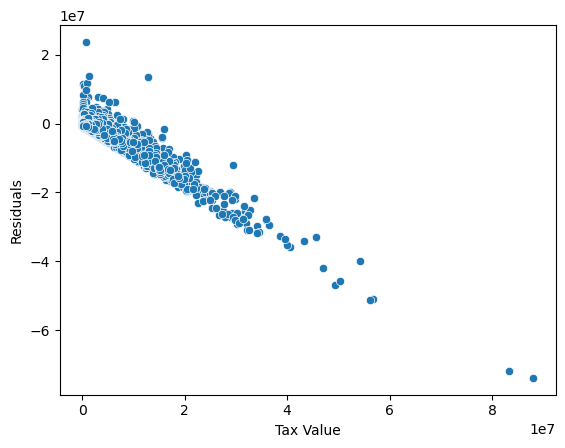

In [62]:
plot_residuals(preds.tax_value, preds.yhat_mean_res)

In [87]:
def regression_errors(y, yhat):
    
    mse = mean_squared_error(y, yhat)
    rmse = mean_squared_error(y, yhat, squared=False)
    sse= mse * len(y)
    ess = yhat-y.mean()
    ess = ess ** 2
    ess = ess.sum()
    tss = ess + sse
    
    print(f'''
        SSE: {sse}
        MSE: {mse}
        RMSE: {rmse}
        ESS: {ess}
        TSS: {tss}
    ''')
    
    return mse, rmse, sse, ess, tss
    
    

In [88]:
regression_errors(preds.tax_value, preds.yhat)


        SSE: 3.436662304664989e+17
        MSE: 288088729037.9547
        RMSE: 536738.976633852
        ESS: 2.041256374413846e+17
        TSS: 5.477918679078835e+17
    


(288088729037.9547,
 536738.976633852,
 3.436662304664989e+17,
 2.041256374413846e+17,
 5.477918679078835e+17)

In [89]:
def baseline_mean_errors(y):
    
    baseline = np.repeat(y.mean(), len(preds))
    
    mse= mean_squared_error(y, baseline)
    sse = mse * len(y)
    rmse = mean_squared_error(y, baseline, squared=False)
    
    print(f'''
        SSE: {sse}
        MSE: {mse}
        RMSE: {rmse}
    ''')
    
    return mse, sse, rmse

    

In [90]:
baseline_mean_errors(preds.tax_value)


        SSE: 5.477918679078105e+17
        MSE: 459203287994.48956
        RMSE: 677645.3998917794
    


(459203287994.48956, 5.477918679078105e+17, 677645.3998917794)

In [84]:
def better_than_baseline(y, yhat):
    
    sse, mse, rmse, ess, tss = regression_errors(y, yhat)
    
    mse_base, sse_base, rmse_base = baseline_mean_errors(y)
    
    if sse_base < sse_yhat:
        print('Baseline is better')
    else:
        print ('Model is better')

In [85]:
better_than_baseline(preds.tax_value, preds.yhat)

Model is better
